# Class Performance Prediction

**Problem Description:**

This is an educational data set which is collected from learning management system (LMS) called Kalboard 360. Kalboard 360 is a multi-agent LMS, which has been designed to facilitate learning through the use of leading-edge technology. Such system provides users with a synchronous access to educational resources from any device with Internet connection.

The data is collected using a learner activity tracker tool, which called experience API (xAPI). The xAPI is a component of the training and learning architecture (TLA) that enables to monitor learning progress and learner’s actions like reading an article or watching a training video. The experience API helps the learning activity providers to determine the learner, activity and objects that describe a learning experience.
The dataset consists of 480 student records and 16 features. The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

The dataset consists of 305 males and 175 females. The students come from different origins such as 179 students are from Kuwait, 172 students are from Jordan, 28 students from Palestine, 22 students are from Iraq, 17 students from Lebanon, 12 students from Tunis, 11 students from Saudi Arabia, 9 students from Egypt, 7 students from Syria, 6 students from USA, Iran and Libya, 4 students from Morocco and one student from Venezuela.

The dataset is collected through two educational semesters: 245 student records are collected during the first semester and 235 student records are collected during the second semester.

The data set includes also the school attendance feature such as the students are classified into two categories based on their absence days: 191 students exceed 7 absence days and 289 students their absence days under 7.

This dataset includes also a new category of features; this feature is parent parturition in the educational process. Parent participation feature have two sub features: Parent Answering Survey and Parent School Satisfaction. There are 270 of the parents answered survey and 210 are not, 292 of the parents are satisfied from the school and 188 are not.

**Source:** https://www.kaggle.com/aljarah/xAPI-Edu-Data

**Attributes Description:**

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

The students are classified into three numerical intervals based on their total grade/mark:

Low-Level (L): interval includes values from 0 to 69,

Middle-Level (M): interval includes values from 70 to 89,

High-Level (H): interval includes values from 90-100.

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df1 = pd.read_csv('performance.csv')
df1.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
# Shape of DataSet
df1.shape

(480, 17)

##  1. EDA

In [4]:
# Informational summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
# Number of categorical and numerical columns

print('Numerical columns: ',df1.select_dtypes(np.number).shape[1])
print('Categorical columns: ',df1.select_dtypes(object).shape[1])

Numerical columns:  4
Categorical columns:  13


In [6]:
# 5 point summary of numerical features
df1.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


<AxesSubplot:>

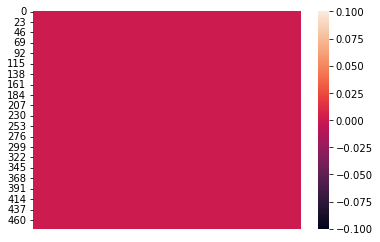

In [7]:
# Checking for Nulls -- NO NULLS ARE PRESENT
sns.heatmap(df1.isnull(),xticklabels=False)

<AxesSubplot:>

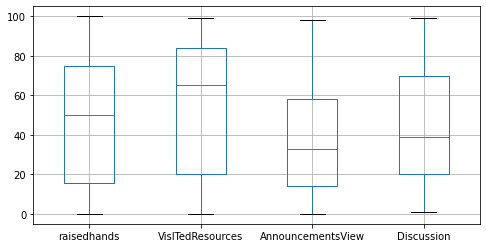

In [8]:
# Outliers -- OUTLIERS ARE NOT PRESENT
plt.figure(figsize=(8,4))
df1.boxplot()

<AxesSubplot:xlabel='gender', ylabel='count'>

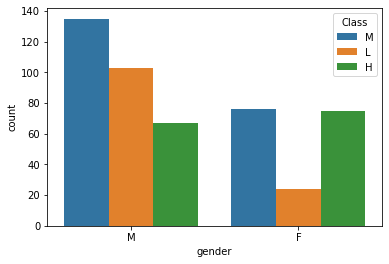

In [9]:
# Comparing the performance of male and female students
sns.countplot(df1['gender'], hue = df1['Class'])

**Inference:**
1. Number of male and female students with High Performance (H) are equal.
2. Only few female students shows Low Performance (L).
3. Number of Average performing (M) students in males are highest across all the categories. 

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

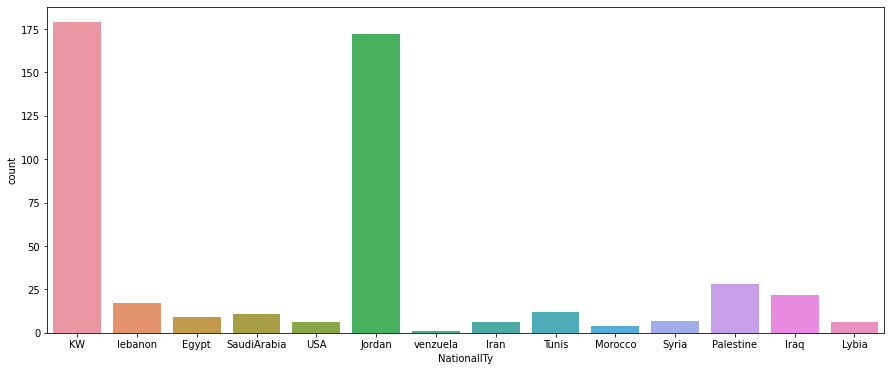

In [10]:
# Countplot of Nationality
plt.figure(figsize=(15,6))
sns.countplot(df1['NationalITy'])

**Inference:**
1. Dataset contains highest number of students from KW and Jordan.
2. Venzuela students are least in numbers.

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

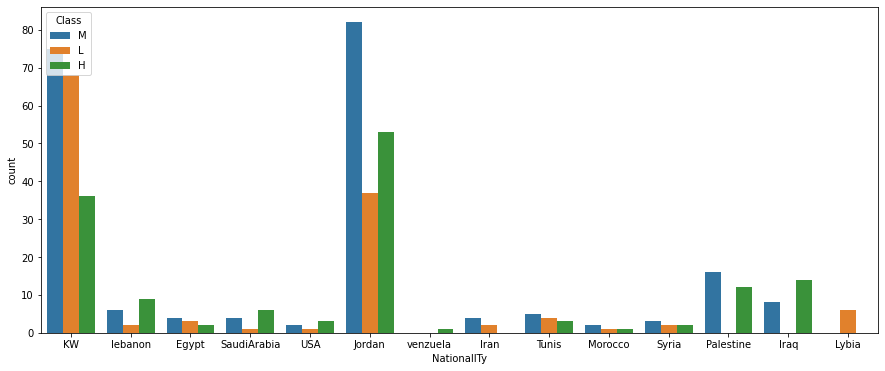

In [11]:
# Comparing the performance of diffrent nationality
plt.figure(figsize=(15,6))
sns.countplot(df1['NationalITy'],hue= df1['Class'])

**Inference:**
1. All students from Venzuela are High performing students.
2. All students from Lybia are Low performing students.

<AxesSubplot:xlabel='GradeID', ylabel='count'>

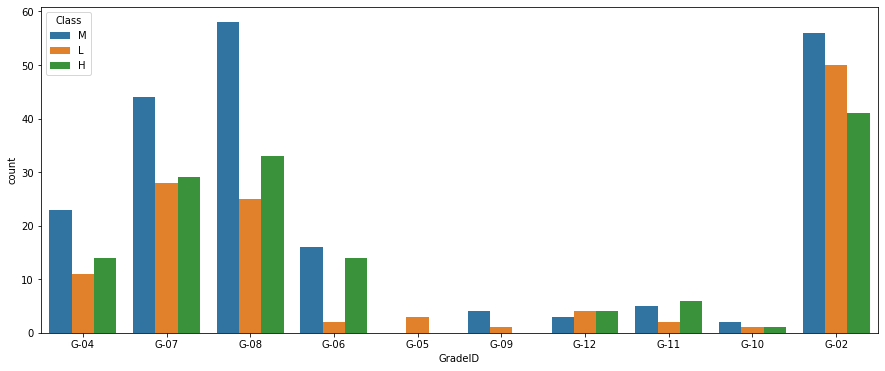

In [12]:
# Comparing the performance of different grade
plt.figure(figsize=(15,6))
sns.countplot(df1['GradeID'],hue= df1['Class'])

**Inference:**
1. All students from G-05 are low performing students.
2. G-09 have no high performing students.
3. G-02 have high sum of low and average performing students meaning a lot of G-02 studnets are struggling in studies.
4. G-08 have highest averge performing students.

<AxesSubplot:xlabel='Topic', ylabel='count'>

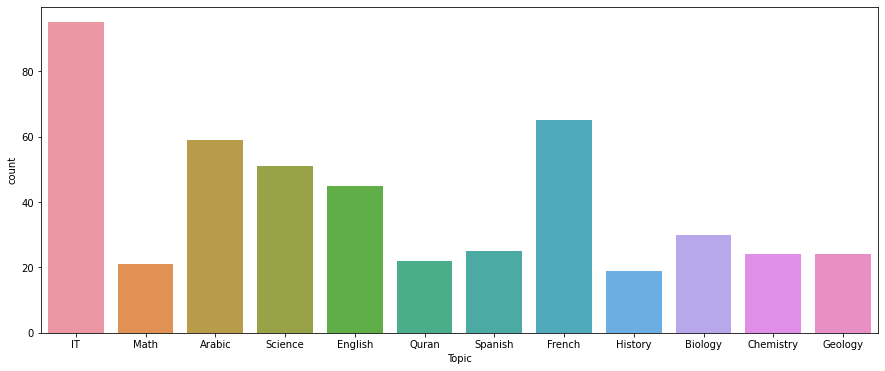

In [13]:
# Countplot of Subject studied by students
plt.figure(figsize=(15,6))
sns.countplot(df1['Topic'])

**Inference:**
1. Most of students are studying IT.
2. French is second most prefered studnets with Arabic, Science and English being close 3,4,5 respectively.

<AxesSubplot:xlabel='Topic', ylabel='count'>

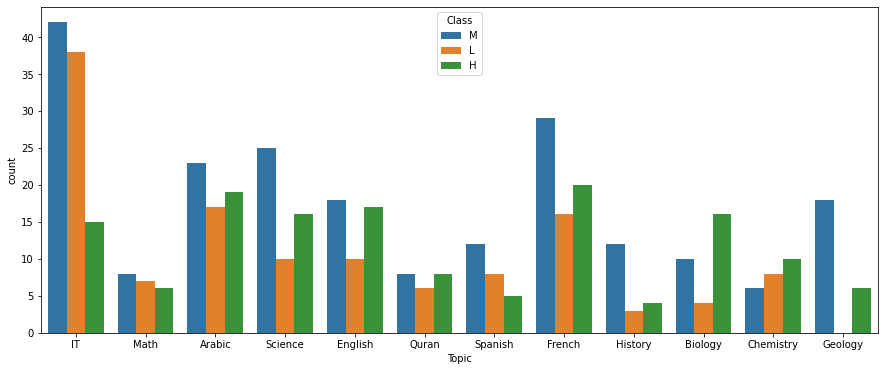

In [14]:
# Comparing the performance of different subject
plt.figure(figsize=(15,6))
sns.countplot(df1['Topic'],hue= df1['Class'])

**Inference:**
1. No student is performing low on Geology.
2. Since we have highest number of students in IT hence it contains highest number of students performing low and averge.

<AxesSubplot:xlabel='Semester', ylabel='count'>

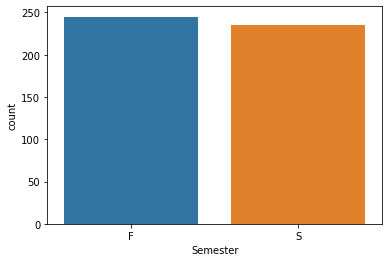

In [15]:
# Count plot of Semesters
sns.countplot(df1['Semester'])

**Inference:**
* We have equal number of students in First and Second semester.

<AxesSubplot:xlabel='Semester', ylabel='count'>

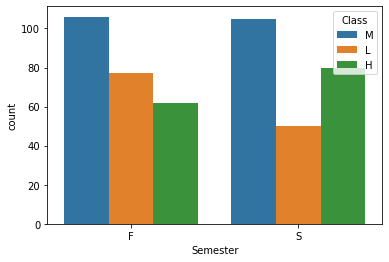

In [16]:
# Comparing the performance with different semesters
sns.countplot(df1['Semester'],hue=df1['Class'])

**Inference:**
1. Number of students performing Low in second semester decreased and high performing increased indicating that second semester studends are performing better than first.

<AxesSubplot:xlabel='Relation', ylabel='count'>

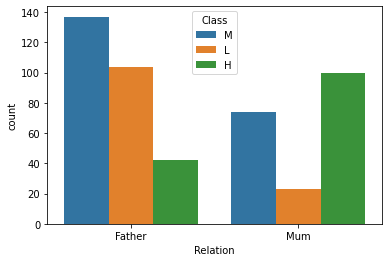

In [17]:
# Comparing the performance with different semesters
sns.countplot(df1['Relation'],hue=df1['Class'])

**Inference:**
1. Students whose mothers are resposible for studies are performing better.  

## 2. Data Prepration

1. Preparing data for model building.
2. Irrelevant features for model building will be dropped.
3. Numerical columns will be scaled
4. Categorical columns will be dummy encoded.

In [18]:
df1.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [19]:
# df2 conatins features revant for model building
df2 = df1.loc[:,['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion','StudentAbsenceDays', 'Class']]
df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,15,16,2,20,Under-7,M
1,20,20,3,25,Under-7,M
2,10,7,0,30,Above-7,L
3,30,25,5,35,Above-7,L
4,40,50,12,50,Above-7,M


In [20]:
# Unique values present in 'StudentAbsenceDays'
df2['StudentAbsenceDays'].unique()

array(['Under-7', 'Above-7'], dtype=object)

In [21]:
# Encoding StudentAbsenceDays
df2['AbsentMoreThan7'] = df2['StudentAbsenceDays'].map({'Under-7':0,'Above-7':1})
df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class,AbsentMoreThan7
0,15,16,2,20,Under-7,M,0
1,20,20,3,25,Under-7,M,0
2,10,7,0,30,Above-7,L,1
3,30,25,5,35,Above-7,L,1
4,40,50,12,50,Above-7,M,1


In [22]:
# Dropping redundent StudentAbsenceDays
df2.drop('StudentAbsenceDays',axis=1,inplace=True)
df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,AbsentMoreThan7
0,15,16,2,20,M,0
1,20,20,3,25,M,0
2,10,7,0,30,L,1
3,30,25,5,35,L,1
4,40,50,12,50,M,1


In [23]:
# Changing the data type from numric to object
df2['AbsentMoreThan7'] = df2['AbsentMoreThan7'].astype('object')

In [24]:
# Seperating numriacland categorical features into 2 seprate dataframe
num_col = df2.select_dtypes(np.number)
cat_col = df2.select_dtypes(object)

In [25]:
# Library
from sklearn.preprocessing import StandardScaler

In [26]:
# Scalling numrical features
SS = StandardScaler()

scaled_num = pd.DataFrame(SS.fit_transform(num_col),columns=num_col.columns)
scaled_num.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-1.033429,-1.174075,-1.351167,-0.843326
1,-0.870813,-1.053029,-1.313549,-0.662225
2,-1.196046,-1.446426,-1.426401,-0.481125
3,-0.545579,-0.901723,-1.238315,-0.300024
4,-0.220346,-0.145191,-0.974994,0.243279


In [27]:
# Categoriacl dataframe
cat_col.head()

,Class,AbsentMoreThan7
0,M,0
1,M,0
2,L,1
3,L,1
4,M,1


In [28]:
# Value counts of Class
cat_col['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [29]:
# Concatinating sacled umrical column and categorical column
final = pd.concat([scaled_num,cat_col],axis=1)
final.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,AbsentMoreThan7
0,-1.033429,-1.174075,-1.351167,-0.843326,M,0
1,-0.870813,-1.053029,-1.313549,-0.662225,M,0
2,-1.196046,-1.446426,-1.426401,-0.481125,L,1
3,-0.545579,-0.901723,-1.238315,-0.300024,L,1
4,-0.220346,-0.145191,-0.974994,0.243279,M,1


## 3. Model Building

<AxesSubplot:>

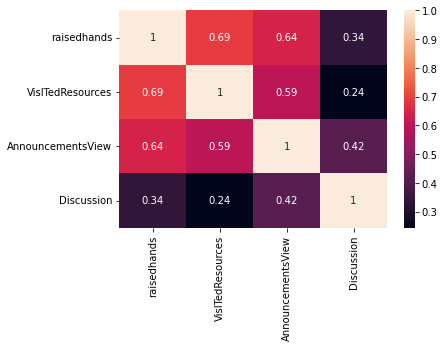

In [30]:
# Corelation metric
sns.heatmap(final.corr(),annot=True)

In [31]:
# Library
from sklearn.model_selection import train_test_split

In [32]:
# Splitting data into test and train 
X = final.drop('Class',axis=1)
y = final.Class

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### 3.1 Logistic Regression

In [40]:
# Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,auc, classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [34]:
# LR Machine
lr = LogisticRegression()

model1 = lr.fit(X,y)
ypred = model1.predict(X_test)

<AxesSubplot:>

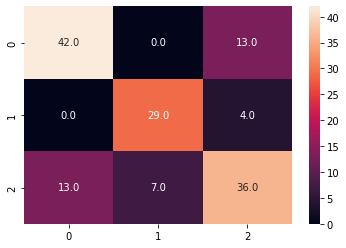

In [37]:
# Confusion metric
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm,fmt='.1f',annot=True)

In [35]:
# Accurary score
accuracy_score(y_test,ypred)

0.7430555555555556

In [39]:
# Classification Report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           H       0.76      0.76      0.76        55
           L       0.81      0.88      0.84        33
           M       0.68      0.64      0.66        56

    accuracy                           0.74       144
   macro avg       0.75      0.76      0.75       144
weighted avg       0.74      0.74      0.74       144



**Infrence:**
1. Logistic Regresson is giving 74.5% Accuracy.
2. From the classification report we can see that precision, recall and F1-score of class M is poor which is making our accurary low.

<AxesSubplot:xlabel='raisedhands', ylabel='VisITedResources'>

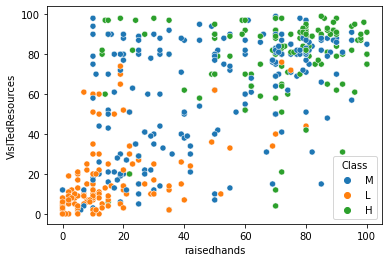

In [45]:
sns.scatterplot(df2['raisedhands'],df2['VisITedResources'], hue=df2['Class'])

**Observation:**
1. Our Logistic model was unable to properly classify Class M.
2. From scatter plot b/w 'raisedhands' and 'VisITedResources' we can see that few students of class M are showing behaviour simmilar to class L and H. 
3. Hence our model was unalble to classify well.

### 3.2 CatBoost

In [47]:
# Library
from catboost import CatBoostClassifier

In [48]:
# Machine
cbc = CatBoostClassifier()

model2 = cbc.fit(X,y)
ypred = model2.predict(X_test)

Learning rate set to 0.07622
0:	learn: 1.0507162	total: 335ms	remaining: 5m 34s
1:	learn: 1.0104668	total: 339ms	remaining: 2m 49s
2:	learn: 0.9736749	total: 349ms	remaining: 1m 56s
3:	learn: 0.9423036	total: 356ms	remaining: 1m 28s
4:	learn: 0.9120681	total: 357ms	remaining: 1m 11s
5:	learn: 0.8840995	total: 360ms	remaining: 59.6s
6:	learn: 0.8595010	total: 362ms	remaining: 51.4s
7:	learn: 0.8373435	total: 364ms	remaining: 45.2s
8:	learn: 0.8161564	total: 366ms	remaining: 40.3s
9:	learn: 0.7954727	total: 368ms	remaining: 36.4s
10:	learn: 0.7786787	total: 371ms	remaining: 33.3s
11:	learn: 0.7625048	total: 374ms	remaining: 30.8s
12:	learn: 0.7470836	total: 375ms	remaining: 28.5s
13:	learn: 0.7314506	total: 377ms	remaining: 26.6s
14:	learn: 0.7161523	total: 379ms	remaining: 24.9s
15:	learn: 0.7042223	total: 380ms	remaining: 23.4s
16:	learn: 0.6912058	total: 382ms	remaining: 22.1s
17:	learn: 0.6800246	total: 384ms	remaining: 20.9s
18:	learn: 0.6699951	total: 387ms	remaining: 20s
19:	learn

229:	learn: 0.2874924	total: 824ms	remaining: 2.76s
230:	learn: 0.2864657	total: 826ms	remaining: 2.75s
231:	learn: 0.2858087	total: 828ms	remaining: 2.74s
232:	learn: 0.2850512	total: 830ms	remaining: 2.73s
233:	learn: 0.2844616	total: 832ms	remaining: 2.72s
234:	learn: 0.2840116	total: 833ms	remaining: 2.71s
235:	learn: 0.2829215	total: 836ms	remaining: 2.71s
236:	learn: 0.2822443	total: 838ms	remaining: 2.7s
237:	learn: 0.2816610	total: 840ms	remaining: 2.69s
238:	learn: 0.2811258	total: 843ms	remaining: 2.68s
239:	learn: 0.2806137	total: 845ms	remaining: 2.68s
240:	learn: 0.2799849	total: 849ms	remaining: 2.67s
241:	learn: 0.2793369	total: 852ms	remaining: 2.67s
242:	learn: 0.2783624	total: 854ms	remaining: 2.66s
243:	learn: 0.2776800	total: 857ms	remaining: 2.65s
244:	learn: 0.2772645	total: 859ms	remaining: 2.65s
245:	learn: 0.2767826	total: 862ms	remaining: 2.64s
246:	learn: 0.2765217	total: 864ms	remaining: 2.63s
247:	learn: 0.2758001	total: 867ms	remaining: 2.63s
248:	learn: 0

394:	learn: 0.2015854	total: 1.15s	remaining: 1.76s
395:	learn: 0.2012391	total: 1.15s	remaining: 1.76s
396:	learn: 0.2010174	total: 1.16s	remaining: 1.76s
397:	learn: 0.2007095	total: 1.16s	remaining: 1.75s
398:	learn: 0.2005678	total: 1.16s	remaining: 1.75s
399:	learn: 0.2002579	total: 1.17s	remaining: 1.75s
400:	learn: 0.1998943	total: 1.17s	remaining: 1.75s
401:	learn: 0.1996599	total: 1.18s	remaining: 1.75s
402:	learn: 0.1992061	total: 1.18s	remaining: 1.75s
403:	learn: 0.1986818	total: 1.18s	remaining: 1.74s
404:	learn: 0.1984069	total: 1.19s	remaining: 1.74s
405:	learn: 0.1980875	total: 1.19s	remaining: 1.74s
406:	learn: 0.1977796	total: 1.19s	remaining: 1.74s
407:	learn: 0.1975135	total: 1.2s	remaining: 1.74s
408:	learn: 0.1972413	total: 1.2s	remaining: 1.73s
409:	learn: 0.1968336	total: 1.2s	remaining: 1.73s
410:	learn: 0.1965581	total: 1.21s	remaining: 1.73s
411:	learn: 0.1961829	total: 1.21s	remaining: 1.73s
412:	learn: 0.1958440	total: 1.21s	remaining: 1.72s
413:	learn: 0.1

587:	learn: 0.1438916	total: 1.63s	remaining: 1.14s
588:	learn: 0.1436794	total: 1.64s	remaining: 1.14s
589:	learn: 0.1432689	total: 1.64s	remaining: 1.14s
590:	learn: 0.1431750	total: 1.64s	remaining: 1.14s
591:	learn: 0.1429160	total: 1.64s	remaining: 1.13s
592:	learn: 0.1426660	total: 1.65s	remaining: 1.13s
593:	learn: 0.1425141	total: 1.65s	remaining: 1.13s
594:	learn: 0.1422124	total: 1.65s	remaining: 1.12s
595:	learn: 0.1420897	total: 1.65s	remaining: 1.12s
596:	learn: 0.1417095	total: 1.66s	remaining: 1.12s
597:	learn: 0.1415260	total: 1.66s	remaining: 1.11s
598:	learn: 0.1412886	total: 1.66s	remaining: 1.11s
599:	learn: 0.1410842	total: 1.66s	remaining: 1.11s
600:	learn: 0.1406774	total: 1.67s	remaining: 1.11s
601:	learn: 0.1404467	total: 1.67s	remaining: 1.1s
602:	learn: 0.1402534	total: 1.67s	remaining: 1.1s
603:	learn: 0.1401297	total: 1.67s	remaining: 1.1s
604:	learn: 0.1399617	total: 1.67s	remaining: 1.09s
605:	learn: 0.1396195	total: 1.68s	remaining: 1.09s
606:	learn: 0.1

750:	learn: 0.1129085	total: 1.96s	remaining: 649ms
751:	learn: 0.1127951	total: 1.96s	remaining: 646ms
752:	learn: 0.1126620	total: 1.96s	remaining: 644ms
753:	learn: 0.1124979	total: 1.96s	remaining: 641ms
754:	learn: 0.1123771	total: 1.97s	remaining: 638ms
755:	learn: 0.1122529	total: 1.97s	remaining: 636ms
756:	learn: 0.1120217	total: 1.97s	remaining: 633ms
757:	learn: 0.1118930	total: 1.97s	remaining: 631ms
758:	learn: 0.1117080	total: 1.98s	remaining: 628ms
759:	learn: 0.1115834	total: 1.98s	remaining: 626ms
760:	learn: 0.1114029	total: 1.98s	remaining: 623ms
761:	learn: 0.1113040	total: 1.99s	remaining: 620ms
762:	learn: 0.1111298	total: 1.99s	remaining: 618ms
763:	learn: 0.1109842	total: 1.99s	remaining: 615ms
764:	learn: 0.1108868	total: 1.99s	remaining: 612ms
765:	learn: 0.1107614	total: 1.99s	remaining: 609ms
766:	learn: 0.1106804	total: 2s	remaining: 606ms
767:	learn: 0.1105682	total: 2s	remaining: 603ms
768:	learn: 0.1104531	total: 2s	remaining: 601ms
769:	learn: 0.1104063

953:	learn: 0.0878740	total: 2.44s	remaining: 118ms
954:	learn: 0.0877672	total: 2.44s	remaining: 115ms
955:	learn: 0.0876953	total: 2.44s	remaining: 113ms
956:	learn: 0.0876308	total: 2.45s	remaining: 110ms
957:	learn: 0.0875880	total: 2.45s	remaining: 107ms
958:	learn: 0.0875172	total: 2.45s	remaining: 105ms
959:	learn: 0.0874267	total: 2.45s	remaining: 102ms
960:	learn: 0.0873645	total: 2.46s	remaining: 99.7ms
961:	learn: 0.0872647	total: 2.46s	remaining: 97.2ms
962:	learn: 0.0871269	total: 2.46s	remaining: 94.6ms
963:	learn: 0.0870366	total: 2.46s	remaining: 92.1ms
964:	learn: 0.0869996	total: 2.47s	remaining: 89.6ms
965:	learn: 0.0869306	total: 2.47s	remaining: 87.1ms
966:	learn: 0.0868003	total: 2.48s	remaining: 84.5ms
967:	learn: 0.0867110	total: 2.48s	remaining: 82ms
968:	learn: 0.0866511	total: 2.48s	remaining: 79.4ms
969:	learn: 0.0865382	total: 2.48s	remaining: 76.8ms
970:	learn: 0.0864264	total: 2.49s	remaining: 74.3ms
971:	learn: 0.0863484	total: 2.49s	remaining: 71.7ms
97

<AxesSubplot:>

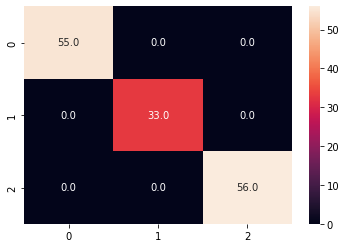

In [49]:
# Confusion matrix
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm,fmt='.1f',annot=True)

In [50]:
# Accurary score
accuracy_score(y_test,ypred)

1.0

In [51]:
# Classification Report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           H       1.00      1.00      1.00        55
           L       1.00      1.00      1.00        33
           M       1.00      1.00      1.00        56

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



**Inference:**
1. Without making any changes in data, CATBOOST is able to classify all the classes correctly.
2. CATBOOST is a powerful algorithm.